Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its
application.

Min-Max scaling (also known as normalization) is a technique used in data preprocessing to scale numeric features to a specific range, typically between 0 and 1. This method rescales the data, preserving the shape of the original distribution while normalizing the range of values.

The formula for Min-Max scaling is:

    Xscaled = ( X - Xmin/ Xmax - Xmin)

X =  is an original value of a feature

Xmin = is the minimum value of that feature in the dataset.

Xmax = is the maximum value of that feature in the dataset.

Xscaled = The scaled value will be in the range [0, 1] for all values of X.

Example 

Original Data:

    Age = [25,30,35,40,45,50]

Calculate Xmin and Xmax:

    Xmin = 25

    Xmax =50

Apply Min-Max Scaling For each Age=X:

    Xscaled = ( X - Xmin/ Xmax - Xmin)
    
    Xscaled = ( X - 25/ 50 - 25) = Xscaled = ( X - 25/ 25)
    
Scaled Ages:

    Xscaled = [( 25 - 25/ 25),( 30 - 25/ 25),( 35 - 25/ 25),( 40 - 25/ 25),( 45 - 25/ 25),( 50 - 25/ 25)]

    Xscaled = [0.0,0.2,0.4,0.6,0.8,1.0]



Therefore, the ages have been scaled to the range [0, 1], making it easier for machine learning algorithms to handle these features. Min-Max scaling is particularly useful when features have different units or scales and helps in preventing certain features from dominating due to their larger scale.

Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.


The Unit Vector technique, also known as Vector Normalization, is a method of feature scaling that involves scaling individual samples to have a unit norm (i.e., a vector of magnitude 1). This technique is used to normalize data points along each feature vector, rather than across different features like Min-Max scaling.

The process involves dividing each feature vector by its Euclidean norm (magnitude), essentially projecting each data point onto the unit sphere or hypersphere. This ensures that all feature vectors have the same scale and are directionally consistent, which can be beneficial for algorithms that rely on the magnitude of feature vectors, such as clustering algorithms or algorithms that use distance measures.

Given a feature vector X = (x1,x2,x3...,xn),

unit vector u = X/ ||X||,

where ||X|| is the Euclidean norm of X 

Difference from Min-Max Scaling:

Unit Vector Scaling: Focuses on normalizing individual samples (feature vectors) to have a consistent magnitude (norm) across all features. This ensures that each sample is scaled to a unit length, making the direction of the vector more significant.

Min-Max Scaling: Focuses on scaling each feature independently across the entire dataset to a specified range (e.g., [0, 1] or [-1, 1]). This technique preserves the distribution and shape of each feature, bringing all features to a common scale for modeling purposes.



Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an
example to illustrate its application.

PCA (Principal Component Analysis) is a statistical technique used for dimensionality reduction in data analysis and machine learning. The primary goal of PCA is to reduce the number of dimensions (or features) in a dataset while preserving as much variance (information) as possible. This reduction is achieved by transforming the original features into a new set of orthogonal (uncorrelated) features called principal components.

Standardization:

Standardize the dataset by subtracting the mean and scaling to unit variance (optional but recommended for PCA).

Compute Covariance Matrix:

Calculate the covariance matrix of the standardized dataset.

Compute Eigenvalues and Eigenvectors:

Find the eigenvalues and corresponding eigenvectors of the covariance matrix. Each eigenvector represents a principal component, and its eigenvalue represents the amount of variance explained by that component.

Select Principal Components:

Sort the eigenvectors based on their eigenvalues in descending order. Choose the top K eigenvectors (principal components) that explain the most variance (typically, select components that capture a high percentage of total variance).

Transform Data:

Project the original dataset onto the selected principal components to obtain a reduced-dimensional representation of the data.

Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

The relationship between PCA (Principal Component Analysis) and feature extraction is that PCA can be effectively used as a feature extraction technique. Feature extraction involves transforming raw data into a new set of features that captures the essential information while reducing redundancy and noise. PCA achieves this by identifying the most important features (principal components) that explain the variance in the data.

How PCA is Used for Feature Extraction:


Dimensionality Reduction:

PCA reduces the dimensionality of the data by transforming a high-dimensional dataset into a lower-dimensional space. This is achieved by selecting a subset of the most significant principal components that capture the maximum variance in the original data.

Identifying Important Features:

The principal components identified by PCA represent linear combinations of the original features. These components are ordered based on the amount of variance they explain in the data. The first few principal components often capture the most important information present in the dataset.

Feature Subset Selection:

By selecting a subset of principal components (features) that explain a desired amount of variance (e.g., 95%), PCA effectively extracts the most informative features from the original dataset. This reduces computational complexity and can enhance the performance of machine learning models by focusing on the most relevant features.

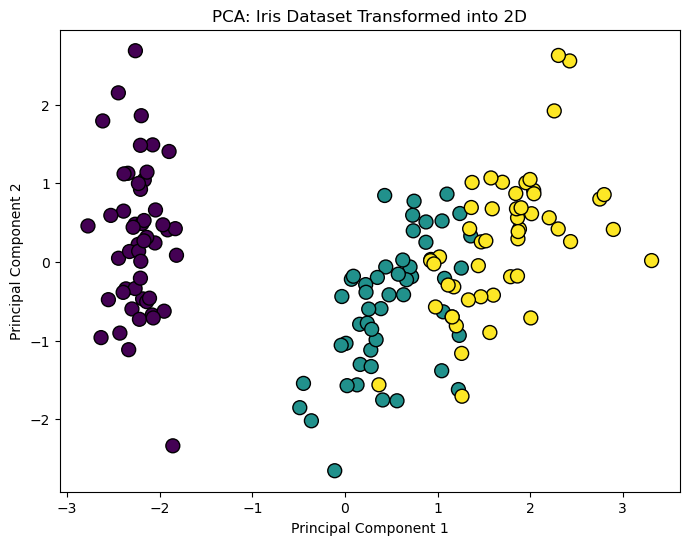

Explained Variance Ratio:
PC1: 0.73
PC2: 0.23

Principal Components (Feature Vectors):
PC1: sepal length (cm) (0.52), sepal width (cm) (-0.27), petal length (cm) (0.58), petal width (cm) (0.56)
PC2: sepal length (cm) (0.38), sepal width (cm) (0.92), petal length (cm) (0.02), petal width (cm) (0.07)


In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for feature extraction
pca = PCA(n_components=2)  # Extract 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA: Iris Dataset Transformed into 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print the explained variance ratio
print("Explained Variance Ratio:")
for i in range(pca.n_components_):
    print(f"PC{i+1}: {pca.explained_variance_ratio_[i]:.2f}")

# Display the principal components (feature vectors)
print("\nPrincipal Components (Feature Vectors):")
for i in range(pca.n_components_):
    print(f"PC{i+1}: {', '.join(f'{feature_names[j]} ({pca.components_[i][j]:.2f})' for j in range(len(feature_names)))}")


Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Example food delivery dataset (replace with your actual dataset)
data = {
    'price': [10, 20, 15, 25, 30],
    'rating': [4.5, 3.8, 4.2, 4.0, 4.7],
    'delivery_time': [30, 45, 35, 50, 40]
}

df = pd.DataFrame(data)
scaler = MinMaxScaler()
scaled = scaler.fit_transform (df)
scaled_dataframe = pd.DataFrame((scaled), columns = df.columns)
scaled_dataframe

,price,rating,delivery_time
0,0.00,0.777778,0.00
1,0.50,0.000000,0.75
2,0.25,0.444444,0.25
3,0.75,0.222222,1.00
4,1.00,1.000000,0.50


Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X is your feature matrix (e.g., company financial data and market trends)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with desired number of components
pca = PCA(n_components=2)  # K is the number of principal components desired

# Fit PCA on the standardized dataset
pca.fit(X_scaled)

# Transform the dataset using PCA
X_pca = pca.transform(X_scaled)

# Check the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Access principal components (eigenvectors)
principal_components = pca.components_

# Interpret the principal components (e.g., feature contributions)
for i, pc in enumerate(principal_components):
    print(f"Principal Component {i+1}:")
    for feature, weight in zip(feature_names, pc):
        print(f"- {feature}: {weight:.4f}")


Explained Variance Ratio: [0.72962445 0.22850762]
Principal Component 1:
- sepal length (cm): 0.5211
- sepal width (cm): -0.2693
- petal length (cm): 0.5804
- petal width (cm): 0.5649
Principal Component 2:
- sepal length (cm): 0.3774
- sepal width (cm): 0.9233
- petal length (cm): 0.0245
- petal width (cm): 0.0669


Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
values to a range of -1 to 1.

In [45]:
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame([-1, 5, 10, 15, 20])
min_max_scaler = MinMaxScaler()
min_max_scaler
scaled_dataset = min_max_scaler.fit_transform(df)
scaled_dataset

array([[0.        ],
       [0.28571429],
       [0.52380952],
       [0.76190476],
       [1.        ]])